<a href="https://colab.research.google.com/github/ProfessorPatrickSlatraigh/CST2312/blob/main/keyvault.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Key Vault     

API key vault upload to DataFrame in Google Colab   

Created by Professor Patrick under MIT License with no warranty as to fit of purpose or functionality.  This notebook is an example of concepts and not intended to be relied upon for controls or data protection.  

[Available on GitHub](https://github.com/ProfessorPatrickSlatraigh/notebooks/blob/fa4314026c2293a4ad206b3377df2e33edd95808/keyvault.ipynb). 

*note: this notebook uses **Google `files`**, `sqlite3`, `pandas`, and **[VeraCrypt](https://www.veracrypt.fr/en/Home.html)** to load API keys from an encrypted drive into a **DataFrame** in a **Colab** session.*   

**Two different platforms for key storage are demonstrated:**    

1. Use of a `.csv` file in an encrypted drive    
2. Use of a **SQLite** database in an encrypted drive    

Both platforms demonstrated require the mounting of the encrypted **[VeraCrypt](https://www.veracrypt.fr/en/Home.html)** drive before excecution of the Python code.    

*note: while the examples in this notebook work with the [VeraCrypt](https://www.veracrypt.fr/en/Home.html) application to store plaintext files (*.csv, or *.db) inside an encrypted file, the same approach and techniques may be used with other encryption applications or schemes.*    




---



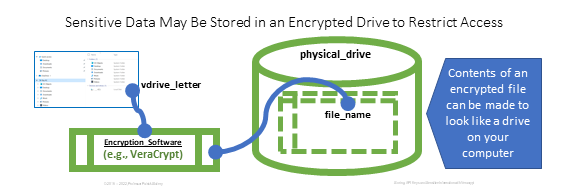

The example encrypted file `file_name` which includes the `.csv' and **SQLite** data files used in this notebook is [available on GitHub](https://github.com/ProfessorPatrickSlatraigh/data/blob/main/file_name).    




---



##Housekeeping    

Import required modules

In [ ]:
import pandas as pd    
from google.colab import files
import sqlite3
import requests

###Pull a sample encrypted file `file_name` from GitHub    

You may use the following `URL` to pull the file `fie_name` which is a 2mb file encrypted with **VeraCrypt**:    

```
https://github.com/ProfessorPatrickSlatraigh/data/blob/01bcba0b179af70d6550994ec39e3e048b820fb8/file_name    
```    




---



##1. Loading API Keys from a .CSV to a DataFrame

###Select the .CSV file with API key information

Select the `.csv` file with the API Key DataFrame elements to be uploaded to the `/content` folder in the Colab session.

*note: the encrypted drive should be mounted to a local drive letter using **VeraCrypt** before attempting the following upload.*   


In [ ]:
# select a file to upload from the mounted local drive
try: 
    file_uploaded = files.upload()
except:
    print("Nothing uploaded.")

In [ ]:
# confirm the name and details of the file uploaded
print(file_uploaded)

Choose the file to be read into the `api_keys` **DataFrame**

In [ ]:
try: 
    i=0
    fname_list=[]
    print("Type the desired file number to select a file: ")
    for fname in file_uploaded.keys():
        print('File #{seq} "{name}" with length {length} bytes'.format(seq=i,
        name=fname, length=len(file_uploaded[fname])))
        fname_list.append(fname)
        i+=1
    selected = int(input("\n"))
    file_selected = fname_list[selected]
except:
    print("\nError selecting file to process for keys.")

In [ ]:
print(file_selected)

###Populate a DataFrame with the API key information

Populate a DataFrame using the uploaded `.csv` file.

In [ ]:
df_keys = pd.read_csv(file_selected, index_col=0)

In [ ]:
df_keys.head()

###Example use of API key information from DataFrame

####Call IPstack.com API using information for DataFrame

In [ ]:
print('The URL is: ', df_keys.loc['ipstack','url'])

In [ ]:
print('The API key is: ', df_keys.loc['ipstack','key'])

In [ ]:
# Want to know more about ipstack and look at the comments  
print('More info about this service: ', df_keys.loc['ipstack','comments'])

In [ ]:
url = df_keys.loc['ipstack','url']
api_key = df_keys.loc['ipstack','key']
arg = url+api_key
resp = requests.get(arg)

In [ ]:
resp

In [ ]:
resp.json()

####Call OpenWeatherMap with API key information   

In [ ]:
print('The URL is: ', df_keys.loc['openweathermap','url'])

In [ ]:
url = df_keys.loc['openweathermap','url']

In [ ]:
print('The params are: ', df_keys.loc['openweathermap','params'])

In [ ]:
params = df_keys.loc['openweathermap','params']

In [ ]:
type(params)

In [ ]:
print('The API key is: ', df_keys.loc['openweathermap','key'])

In [ ]:
api_key = df_keys.loc['openweathermap','key']

In [ ]:
# Insert the API key into the `parama` string (replace 'API_key?')
params_str = params.replace('API_key?', api_key)
# use the `eval()` method to evaluate a string in assignment to dictionary
parameters = eval(params_str)
print('The parameters with API key are: ', parameters)

In [ ]:
print('\nparams_str:', params_str, ' is a ', type(params_str))
print('\nparameters:', parameters, ' is a ', type(parameters))

In [ ]:
print(url, parameters)

In [ ]:
# resp = requests.get(url, params=params_str)
resp = requests.get(url, params=parameters)
print(resp)
data = resp.json()
print(data)



---



##2. Loading API Keys from a SQLite database to a DataFrame

###Select the database file with API key information

Select the **SQLite** database file with the API Key DataFrame elements to be uploaded to the `/content` folder in the Colab session.

*note: the encrypted drive should be mounted to a local drive letter using **VeraCrypt** before attempting the following upload.*   


In [ ]:
# select a file to upload from the mounted local drive
try: 
    file_uploaded = files.upload()
except:
    print("Nothing uploaded.")

In [ ]:
# confirm the name and details of the file uploaded
print(file_uploaded)

Choose the file to be read into the `api_keys` **DataFrame**

In [ ]:
for fname in file_uploaded.keys():
    print('File #{seq} "{name}" with length {length} bytes'.format(seq=i,
    name=fname, length=len(file_uploaded[fname])))

In [ ]:
try: 
    i=0
    fname_list=[]
    print("Type the desired file number to select a file: ")
    for fname in file_uploaded.keys():
        print('File #{seq} "{name}" with length {length} bytes'.format(seq=i,
        name=fname, length=len(file_uploaded[fname])))
        fname_list.append(fname)
        i+=1
    selected = int(input("\n"))
    file_selected = fname_list[selected]
except:
    print("\nError selecting file to process for keys.")

Open a connection to the file chosen.

In [ ]:
# Create a connection to the database file selected.
conn = sqlite3.connect(file_selected) 


###Populate a DataFrame with the API key information

Populate a DataFrame using the uploaded **SQLite** database file.

*note: the code prompts for a table name and defaults to the first available table as the table name if the user just hits enter.*

In [ ]:
# using the open connection, print the available table names
table_list = conn.execute("SELECT name FROM sqlite_master WHERE type='table';")
print('\nTables available: ')
for name in table_list.fetchall():
    print('\t\t  -',name[0])

In [ ]:
table_list = conn.execute("SELECT name FROM sqlite_master WHERE type='table';")
full_list = table_list.fetchall()

In [ ]:
active_table = input('Enter the desired table name: ')
if len(active_table) < 1 :
    table_list = conn.execute("SELECT name FROM sqlite_master WHERE type='table';")
    full_list = table_list.fetchall()
    active_table = full_list[0][0]
print("Proceeding with table: ", active_table, '.')

*note: one additional step to display the field (column) names in the selected table (`active_table`) and to request the desired field to be used as an index when creating the DataFrame. If no field is chosen for the index, then the first field in the table is selected as the index for the DataFrame. 

In [ ]:
# Creating a cursor object using the cursor() method
cursor = conn.cursor()
  
# Display columns
print('\nFields in the selected table', active_table, ':')
sql_field_query = "SELECT * FROM " + active_table
data=cursor.execute(sql_field_query)
t = 0
columns = list()
for column in data.description:
    if t==0:
        index_default = column[0]
    print('\t\t\t\t\t', t, '-',column[0])
    columns.append(column[0])
    t += 1
index_column = input('Enter a field name to use as the DataFrame index: ')
if len(index_column) < 1:
    index_column = index_default
print('You entered "{ic}" as the desired index column.'.format(ic=index_column))
try:
    if int(index_column) > -1:
        index_column = columns[int(index_column)]
except:
    print('Please be sure that "{ic}" is a valid field name.'.format(ic=index_column))
print('Using the field "{ic}" as the DataFrame index'.format(ic=index_column))

The following snippet of code resets `df_keys` to an empty DataFrame (to avoid confusion with the `.csv` loaded data above.

In [ ]:
df_keys = pd.DataFrame()

In [ ]:
df_keys

Using the `active_table` selected in the **SQLite** database on `conn` connection, populate the `df_keys` DataFrame using the `pd.read_sql_query()` method.

In [ ]:
query_statement = 'SELECT * FROM ' + active_table 
df_keys = pd.read_sql_query(query_statement, conn, index_col=index_column)

In [ ]:
df_keys.head()

###Example use of API key information from DataFrame

####Call IPstack.com API using information for DataFrame

In [ ]:
print('The URL is: ', df_keys.loc['ipstack','url'])

In [ ]:
print('The API key is: ', df_keys.loc['ipstack','key'])

In [ ]:
url = df_keys.loc['ipstack','url']
api_key = df_keys.loc['ipstack','key']
arg = url+api_key
resp = requests.get(arg)

In [ ]:
resp

In [ ]:
resp.json()

####Call OpenWeatherMap with API key information   

In [ ]:
print('The URL is: ', df_keys.loc['openweathermap','url'])

In [ ]:
url = df_keys.loc['openweathermap','url']

In [ ]:
print('The params are: ', df_keys.loc['openweathermap','params'])

In [ ]:
params = df_keys.loc['openweathermap','params']

In [ ]:
print('The API key is: ', df_keys.loc['openweathermap','key'])

In [ ]:
api_key = df_keys.loc['openweathermap','key']

In [ ]:
# Insert the API key into the `parama` string (replace 'API_key?')
params_str = params.replace('API_key?', api_key)
# use the `eval()` method to evaluate a string in assignment to dictionary
parameters = eval(params_str)
print('The parameters with API key are: ', parameters)

In [ ]:
print(url, parameters)

In [ ]:
resp = requests.get(url, params=parameters)
data = resp.json()
data



---



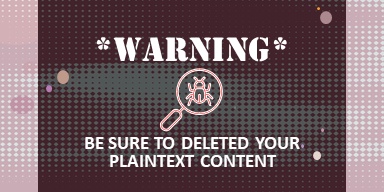

**Final bit of housekeeping...**

##Remove the unencrypted contents from Colab    

*note: the following statement removes all files in the `\content` folder*    


In [ ]:
# Clear any uploaded plaintext files
!rm * 

# Overwrite any variables with plaintext content 
file_uploaded = False
df_keys = False
api_key = False
params_str = False
parameters = False 

**REMEMBER TO DISMOUNT YOUR ENCRYPTED DRIVE ON YOUR LOCAL MACHINE**



---



####***notes:*** 



**NOTES AS OF APR-2022**

The file `file_name` is an encrypted drive file created using VeraCrypt.    

The password to open `file_name` is 'password'.    

The encrypted file and its contents are designed to be used with the Jupyter notebook `keyvault.ipynb` by Professor Patrick (Apr-2022 version) which is available on GitHub at:    

* https://github.com/ProfessorPatrickSlatraigh/notebooks/blob/fa4314026c2293a4ad206b3377df2e33edd95808/keyvault.ipynb

The `keyvault.ipynb` Jupyter notebook is also available inside the encrypted drive file 'file_name' which can be accessed at:    

[file_name](https://github.com/ProfessorPatrickSlatraigh/data/blob/main/file_name)      
    

The encrypted drive (`file_name`) also contains the following plaintext files:    

* api_keys.csv - a comma-separated values file of API key data    
* api_keys.db - a SQLite database with a table `api_keys` of API key data    
* api_keys.xlsx - the Microsoft Excel workbook used to create `api_keys.csv`     

Update the files with your own API keys for the example services and/or add services.     

**FILES DO NOT CONTAIN REAL/ACTIVE API KEYS**    


*Tweet comments and suggestions to @patrickslattery.*       
*Connect on LinkedIn at: linkedin.com/in/patrickslattery.*     





---

